In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

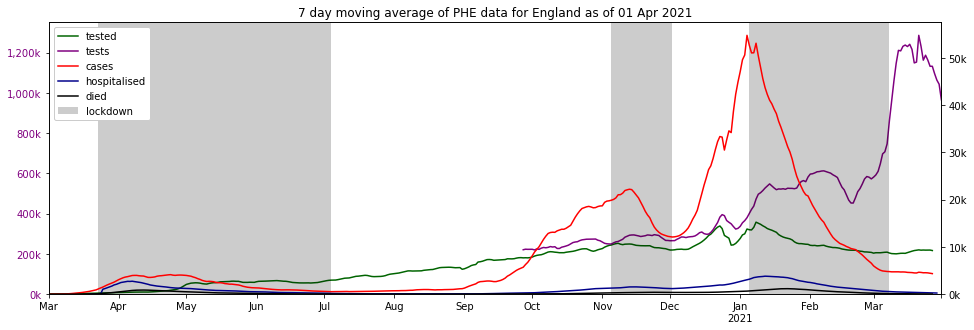

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

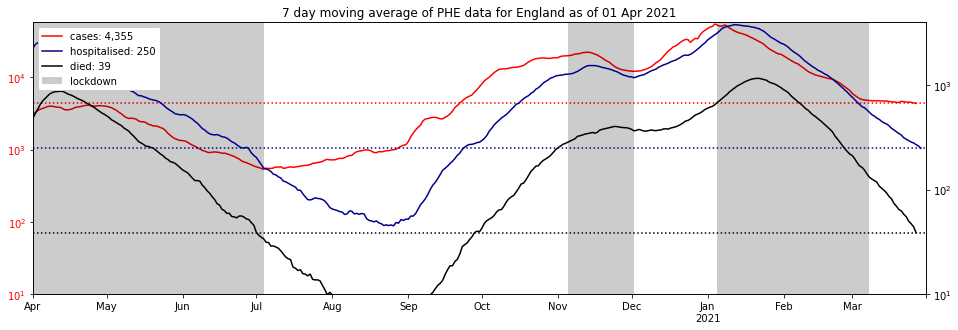

In [3]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

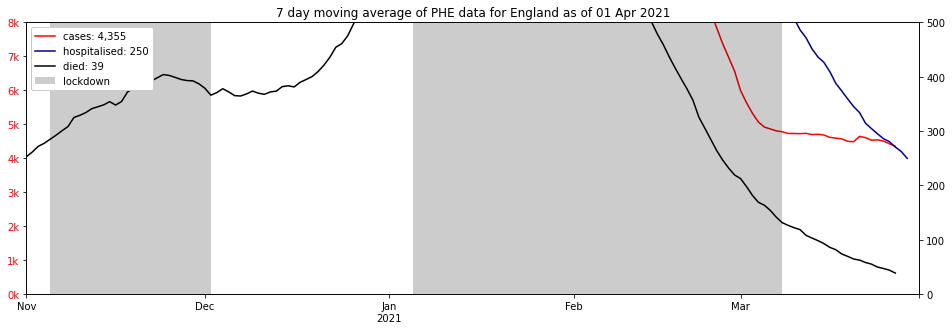

In [4]:
plot_summary(earliest_date='2020-11-01', show_latest=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=8_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=500)

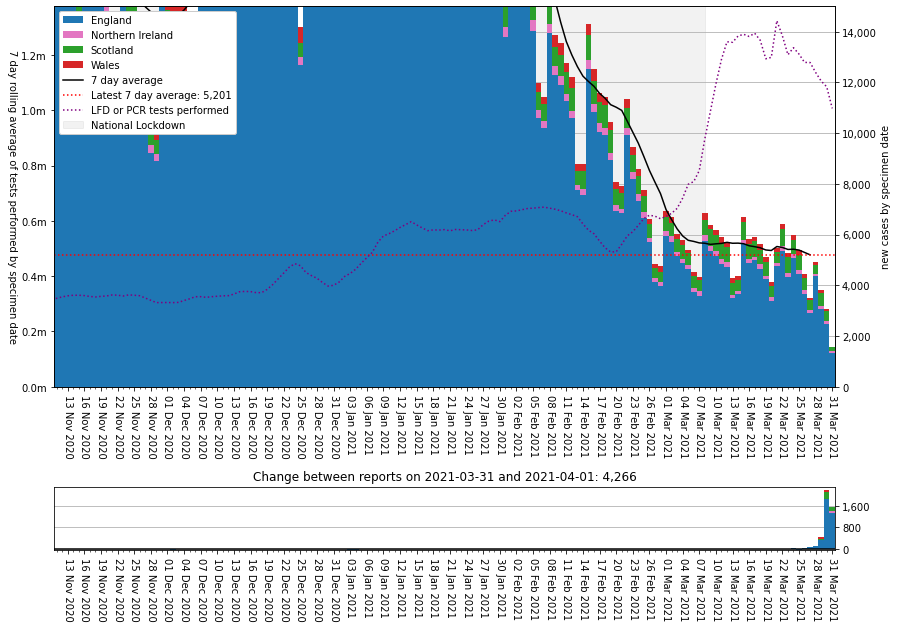

In [5]:
plot_areas(for_date, 'cases_nations', ylim=15_000, earliest='2020-11-11')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,3519105.0,26454219.0,22935114.0,56286961,6.252079,40.746762,53.001160
1,Northern Ireland,N92000002,145753.0,756013.0,610260.0,1893667,7.696865,32.226363,60.076772
2,Scotland,S92000003,399062.0,2493327.0,2094265.0,5463300,7.304413,38.333333,54.362254
3,Wales,W92000004,449538.0,1443885.0,994347.0,3152879,14.258016,31.537747,54.204237


'partial: 31,147,444 (46.6%), full: 4,513,458'

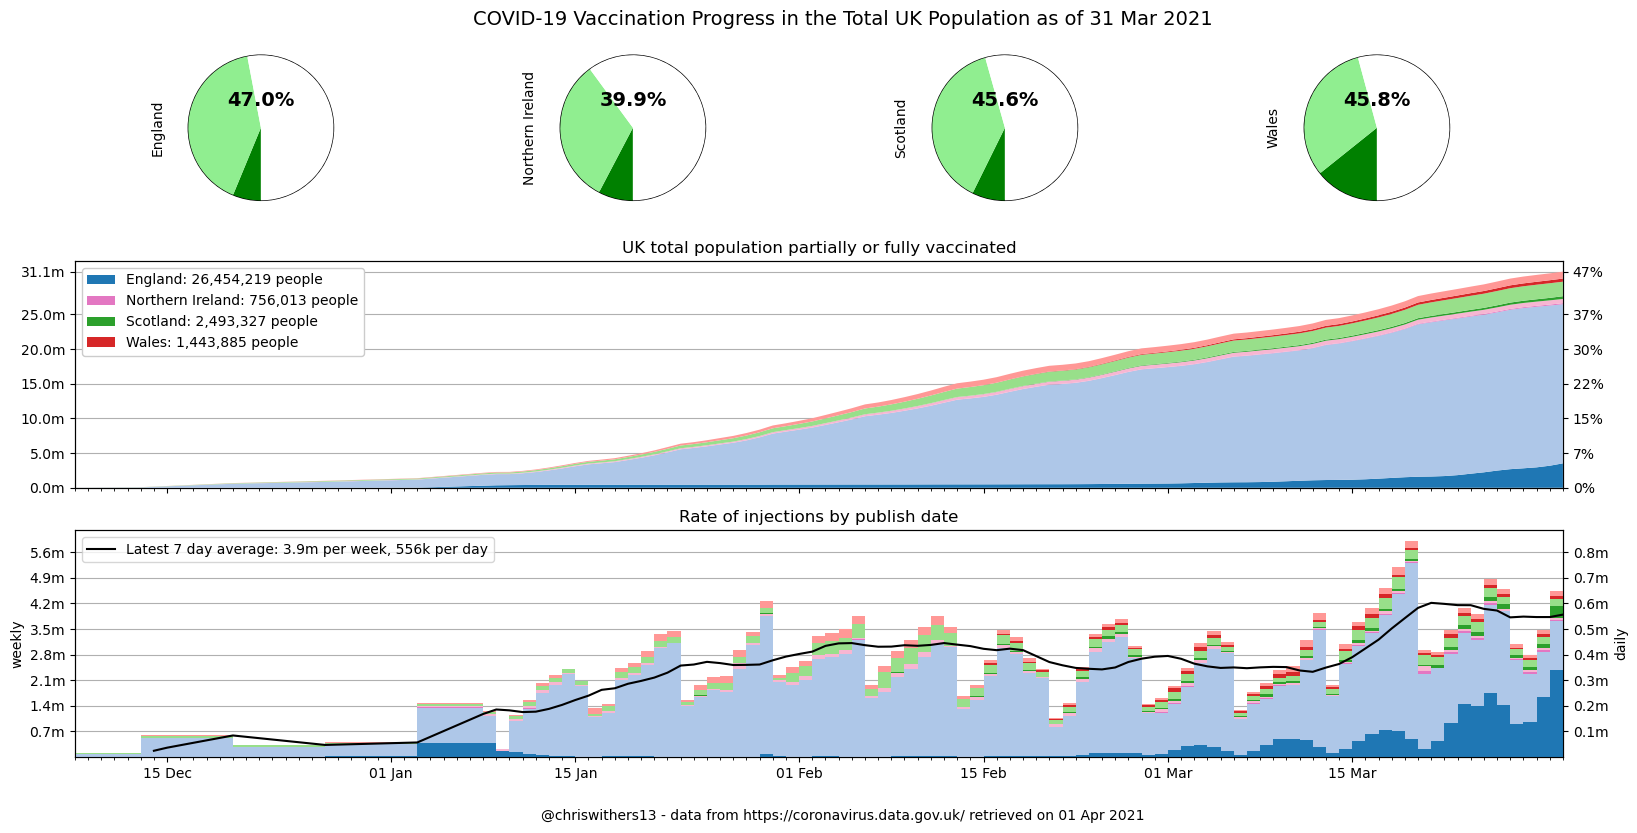

In [6]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [7]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,31 Mar 21,"+188,045","+341,748","+341,748","+26,454,219","+3,519,105","+3,519,105"
Northern Ireland,31 Mar 21,"+6,901","+7,267","+7,267","+756,013","+145,753","+145,753"
Scotland,31 Mar 21,"+30,258","+44,306","+44,306","+2,493,327","+399,062","+399,062"
Wales,31 Mar 21,"+16,702","+11,601","+11,601","+1,443,885","+449,538","+449,538"


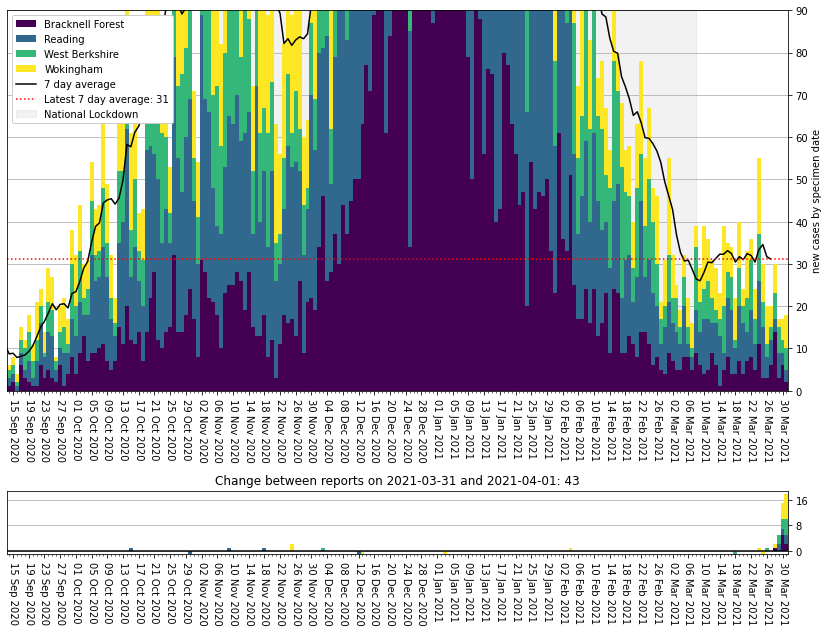

In [8]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=90)

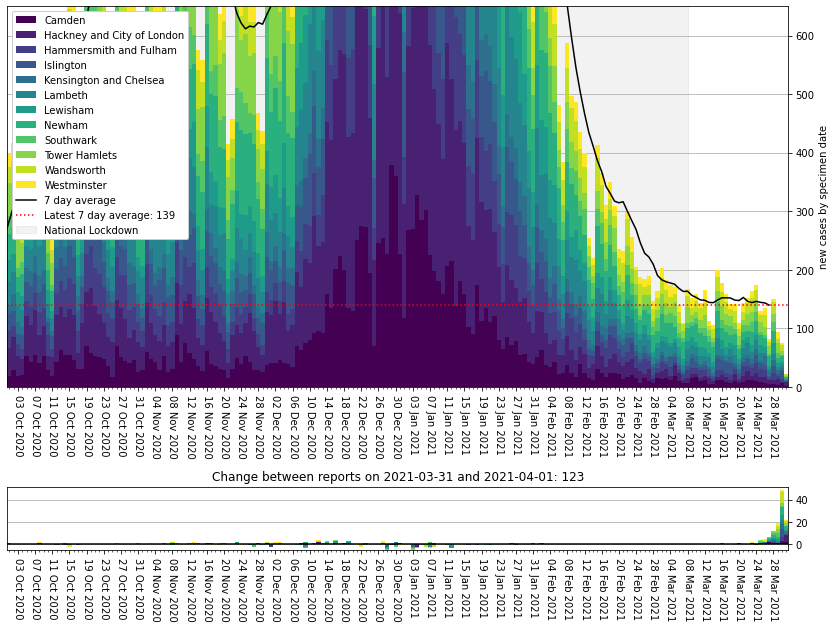

In [9]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000005,Clackmannanshire,228.948390,118.0,2021-03-31
E07000150,Corby,155.085990,112.0,2021-03-31
N09000009,Mid Ulster,117.822902,175.0,2021-03-31
E08000017,Doncaster,117.349065,366.0,2021-03-31
E08000036,Wakefield,109.671789,382.0,2021-03-31
E08000018,Rotherham,107.757403,286.0,2021-03-31
S12000040,West Lothian,106.499181,195.0,2021-03-31
S12000050,North Lanarkshire,103.406861,353.0,2021-03-31
E06000032,Luton,103.261176,220.0,2021-03-31


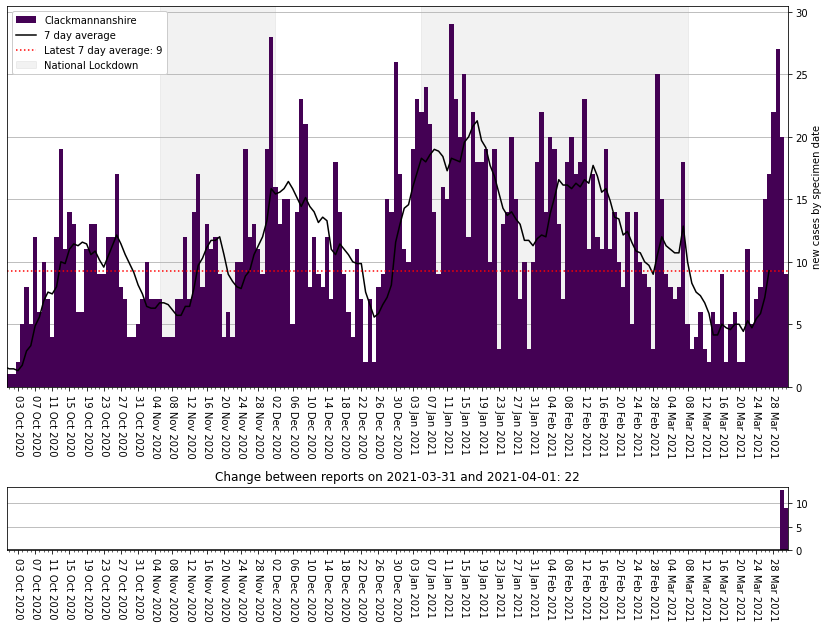

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,89.391645,709.0,2021-03-31
E08000025,Birmingham,49.219839,562.0,2021-03-31
E08000019,Sheffield,92.843843,543.0,2021-03-31
E08000032,Bradford,94.298376,509.0,2021-03-31
S12000049,Glasgow City,69.497094,440.0,2021-03-31
E08000003,Manchester,74.340970,411.0,2021-03-31
E08000036,Wakefield,109.671789,382.0,2021-03-31
E08000017,Doncaster,117.349065,366.0,2021-03-31
S12000050,North Lanarkshire,103.406861,353.0,2021-03-31


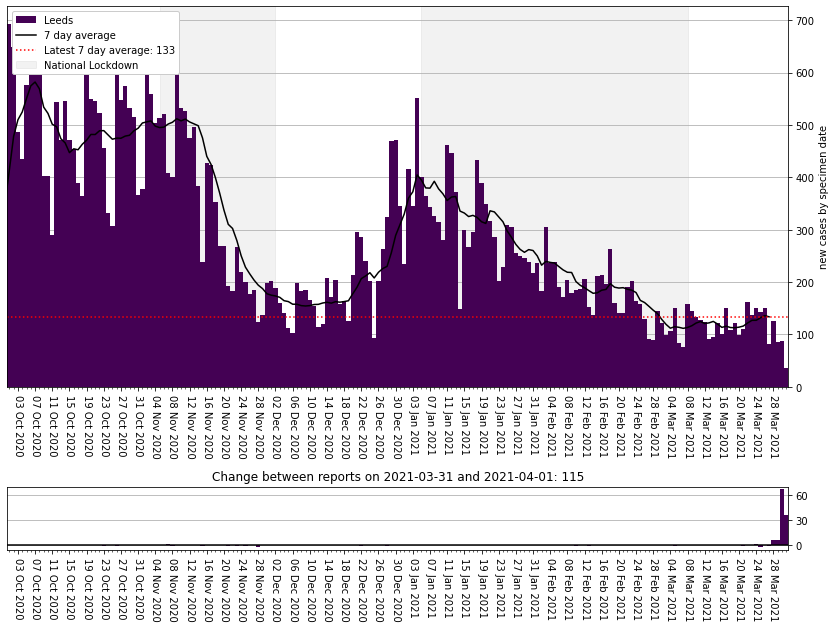

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [15]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.0
phe_max = 0.25

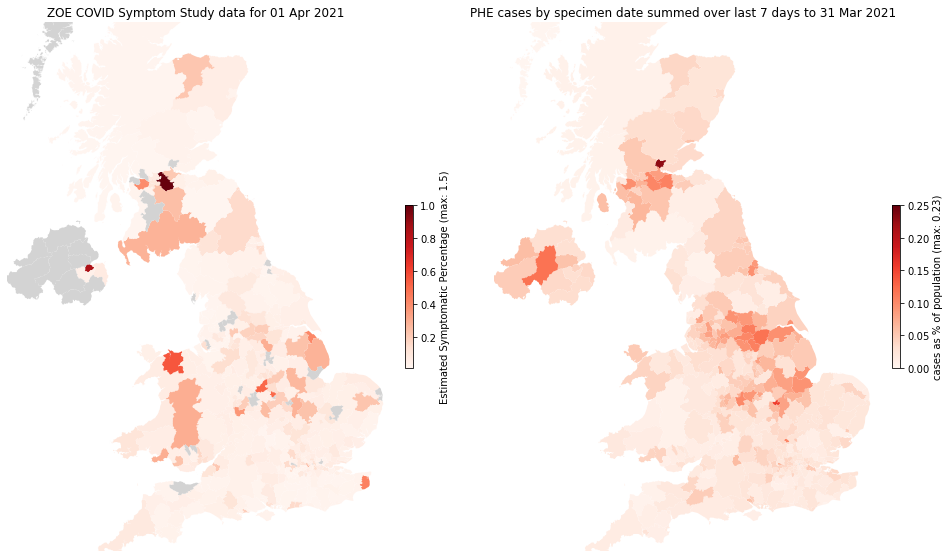

In [16]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [17]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...